In [8]:
import pickle
!pip3 install matplotlib

import numpy as np

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 12.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 9.1 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 13.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 14.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 3.3 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
with open('preprocessed_emojis.pkl', 'rb') as f:
    preprocessed_emojis = pickle.load(f)

print (f'Imagenes cargadas: {len(preprocessed_emojis)}')

# Organiza los datos en matrices numpy
labels = ['Angry', 'Happy', 'Poo', 'Sad', 'Surprised']

X = np.array([img.flatten() for img, _ in preprocessed_emojis])
y = np.array([labels.index(label) for _, label in preprocessed_emojis])

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

Imagenes cargadas: 2530
Forma de X: (2530, 1024)
Forma de y: (2530,)


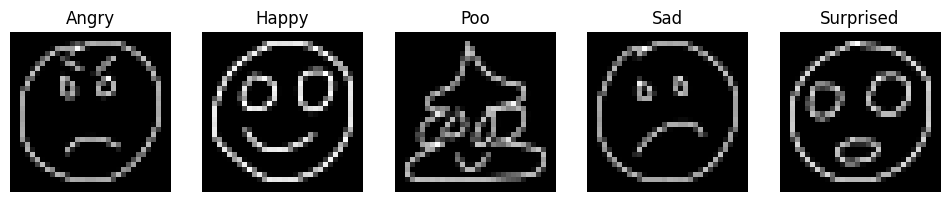

In [9]:
# Muestra una imagen de cada categoría preprocesada
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    for img, img_label in preprocessed_emojis:
        if img_label == label:
            plt.subplot(1, 5, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(label)
            plt.axis('off')
            break

In [3]:
# Divide los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
y_train_cat = to_categorical(y_train, num_classes=len(labels))
y_test_cat = to_categorical(y_test, num_classes=len(labels))

print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train_cat.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test_cat.shape)

Forma de X_train: (2024, 1024)
Forma de y_train: (2024, 5)
Forma de X_test: (506, 1024)
Forma de y_test: (506, 5)


In [4]:
def create_mlp(input_dim, num_classes):
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [5]:
model = create_mlp(input_dim=32*32, num_classes=5)
model.summary()
model.fit(X_test, y_test_cat, epochs=10, batch_size=32, validation_split=0.2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,781 (546.02 KB)

 Trainable params: 139,781 (546.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3960 - loss: 13.6359 - val_accuracy: 0.4902 - val_loss: 7.4916
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6312 - loss: 2.8355 - val_accuracy: 0.5686 - val_loss: 4.4325
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8094 - loss: 0.9273 - val_accuracy: 0.5882 - val_loss: 4.5671
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9158 - loss: 0.3259 - val_accuracy: 0.5490 - val_loss: 4.6381
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9381 - loss: 0.1412 - val_accuracy: 0.6471 - val_loss: 3.8860
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9678 - loss: 0.1393 - val_accuracy: 0.6373 - val_loss: 4.2937
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9827 - loss: 0.0710 - val_accuracy: 0.6275 - val_loss: 4.3042
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9851 - loss: 0.1194 - val_accuracy: 0.6275 - val_

In [6]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)
print(classification_report(y_true_classes, y_pred_classes))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       101
           1       0.91      0.93      0.92       102
           2       1.00      1.00      1.00       101
           3       0.82      0.91      0.86       101
           4       0.94      0.83      0.88       101

    accuracy                           0.91       506
   macro avg       0.91      0.91      0.91       506
weighted avg       0.91      0.91      0.91       506

